In [ ]:
import pandas as pd
import geopandas as gpd

In [11]:
Bike = pd.read_csv("/Users/yeondu/Downloads/final_final.csv", index_col = 0)
Bike = Bike[['대여소번호','위도','경도']]
Bike

,대여소번호,위도,경도
대여일자,,,
2022-06-01,742,37.550732,126.864578
2022-06-01,2059,37.497078,126.917793
2022-06-01,1349,37.623829,127.050201
2022-06-01,750,37.512157,126.835625
2022-06-01,755,37.537869,126.881409
...,...,...,...
2022-06-30,4765,37.568314,127.009461
2022-06-30,4813,37.598778,127.096390
2022-06-30,4564,37.520710,126.939659


In [37]:
Bike[Bike['대여소번호']==102].위도[0]

37.55495071

In [20]:
d = Bike.groupby(['대여소번호'])['대여소번호'].count()
d = pd.DataFrame(d)
d.rename(columns={'대여소번호':'counts'}, inplace = True)
d['대여소번호'] = d.index
print(d)

       counts  대여소번호
대여소번호               
102      3968    102
103      3251    103
104      1824    104
105      1303    105
106      3316    106
...       ...    ...
5851     1306   5851
5852      298   5852
5853     1374   5853
5854     2160   5854
5855      773   5855

[2623 rows x 2 columns]


In [38]:
from shapely import wkt

#위도 column추가
def geo(a):
    newcolumn=[]
    for n in a:
        m= Bike[Bike['대여소번호']==n].위도[0]
        newcolumn.append(m)
    return(newcolumn)

d['위도'] = geo(d['대여소번호'])
d

,counts,대여소번호,위도
대여소번호,,,
102,3968,102,37.555649
103,3251,103,37.554951
104,1824,104,37.550629
105,1303,105,37.550007
106,3316,106,37.548645
...,...,...,...
5851,1306,5851,37.502083
5852,298,5852,37.503006
5853,1374,5853,37.522610


In [82]:
#경도 column추가
def geo(a):
    newcolumn=[]
    for n in a:
        m= Bike[Bike['대여소번호']==n].경도[0]
        newcolumn.append(m)
    return(newcolumn)

d['경도'] = geo(d['대여소번호'])
d
d['counts'].max()

9364

In [53]:
# create seoul map

sample = "/Users/yeondu/Downloads/_census_data_2021_bnd_dong_bnd_dong_11_2021_2021/bnd_dong_11_2021_2021_2Q.shp"
seoul = gpd.read_file(sample)
seoul = pd.DataFrame(seoul)
seoul = seoul['geometry']
#seoul.info()
seoul = pd.Series(seoul)
#seoul.info

<bound method Series.info of 0      POLYGON ((953553.932 1953335.741, 953555.211 1...
1      POLYGON ((953844.081 1955492.177, 953858.644 1...
2      POLYGON ((952490.380 1956548.821, 952497.594 1...
3      POLYGON ((953683.828 1959209.871, 953665.283 1...
4      POLYGON ((952298.144 1953539.606, 952324.838 1...
                             ...                        
420    POLYGON ((968611.972 1946736.729, 968614.219 1...
421    POLYGON ((969658.021 1948737.380, 969656.712 1...
422    POLYGON ((967820.858 1950659.982, 967821.733 1...
423    POLYGON ((966110.271 1950148.101, 966118.161 1...
424    POLYGON ((968944.218 1949625.263, 968943.833 1...
Name: geometry, Length: 425, dtype: geometry>

In [55]:
from shapely.ops import cascaded_union

/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_1438/1391728328.py:2: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(polygons))


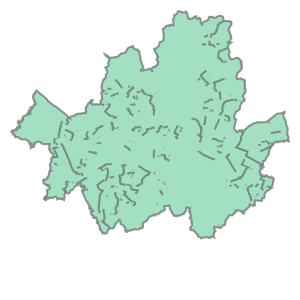

In [60]:
polygons = seoul[:]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]
boundary

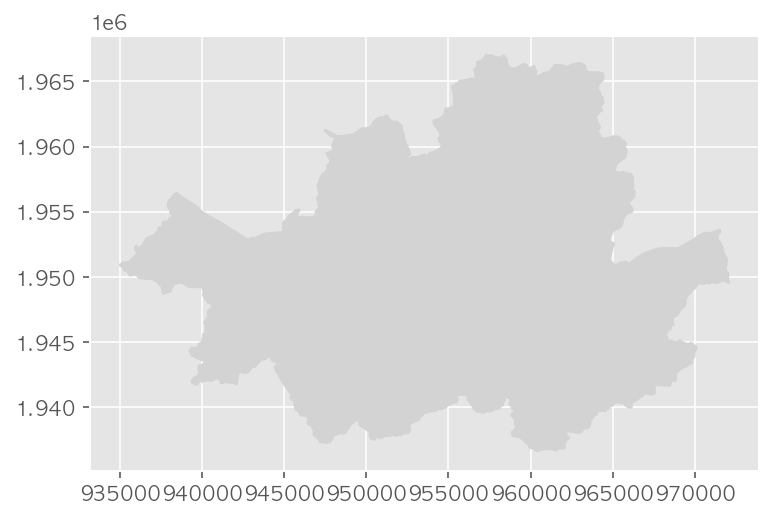

In [115]:
fig, ax = plt.subplots(1,1)
x,y = boundary.exterior.xy
ax.fill(x,y,"lightgrey")
plt.plot(x,y,color='lightgrey')

plt.savefig("/Users/yeondu/Documents/project_datacampus/figures//서울시지도.png",dpi=300)

In [72]:
# 한글깨짐 해결
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "S-Core Dream"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'




/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_1438/2678790386.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='이용 건수(명)')


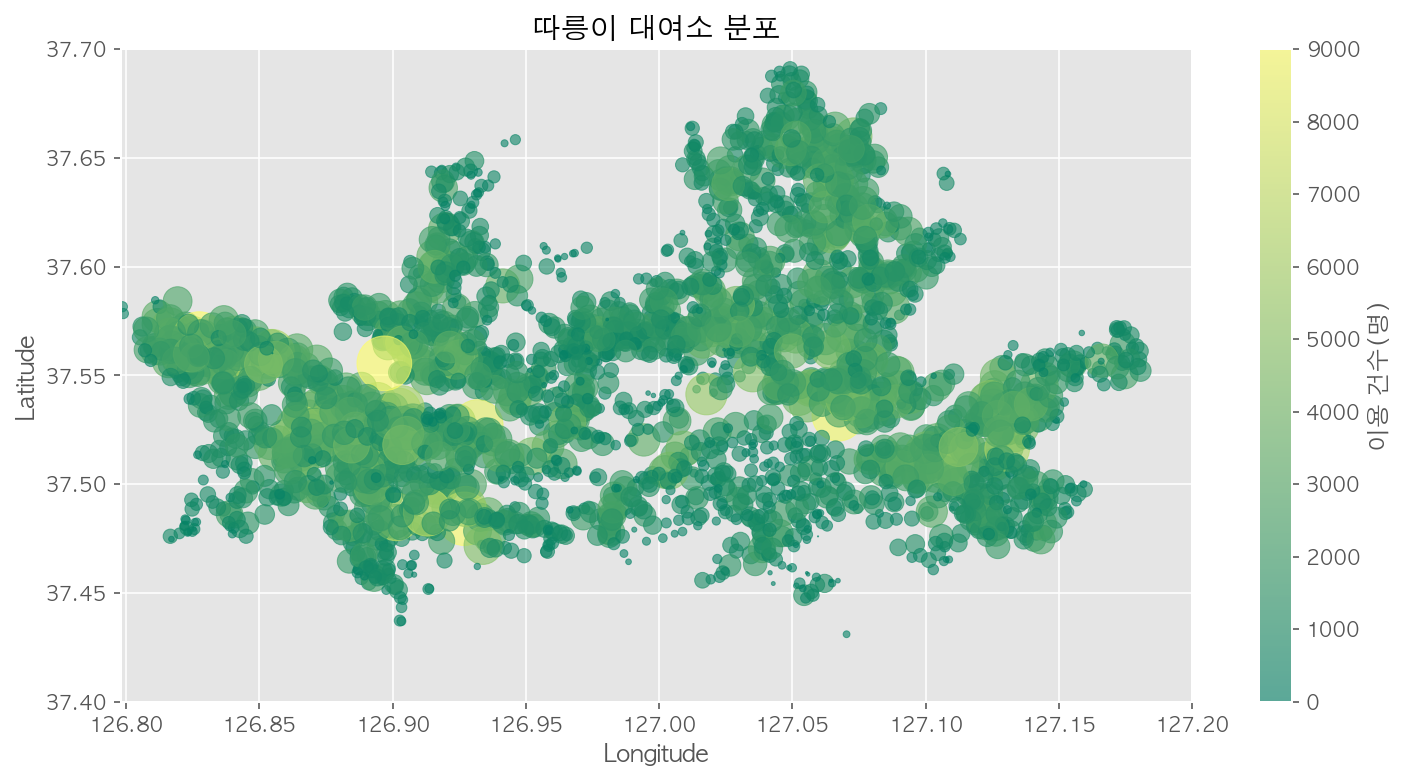

<Figure size 432x288 with 0 Axes>

In [119]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
#k,w = boundary.exterior.xy
#plt.plot(k,w,color='lightgrey')
#x,y = boundary.exterior.xy
#ax.fill(k,w,"lightblue")

x = d['경도']
y = d['위도']
z = d['counts']
plt.scatter(x, y,s=0.08*z, c=z, alpha=0.6, vmin=0, vmax=9000,
            cmap='summer')
plt.colorbar(label='이용 건수(명)')

plt.xlim([126.798000, 127.200000])
plt.ylim([37.400000, 37.700000])


plt.title("따릉이 대여소 분포")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/Users/yeondu/Documents/project_datacampus/figures//따릉이대여소분포.png",dpi=300)

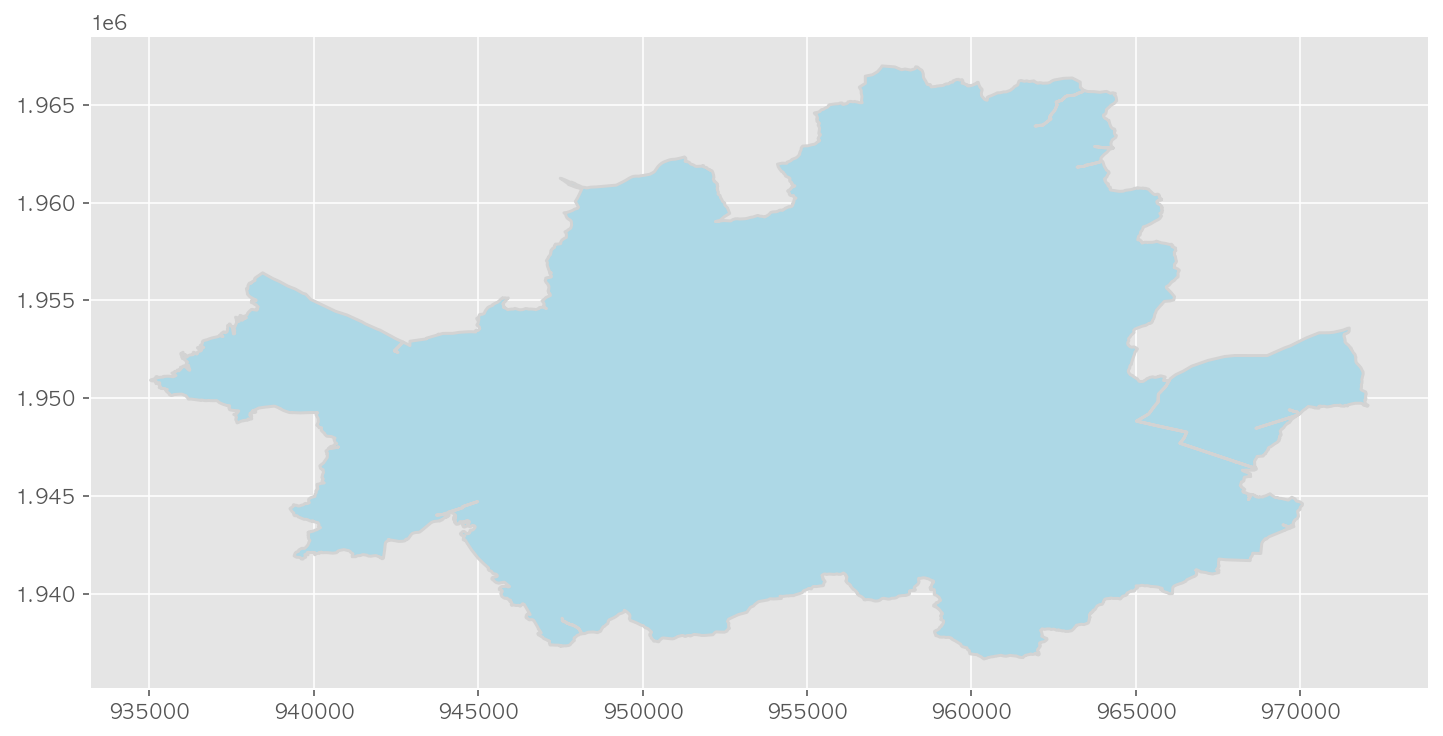

In [109]:
fig, ax = plt.subplots(figsize=(12, 6))
k,w = boundary.exterior.xy
plt.plot(k,w,color='lightgrey')
ax.fill(k,w,"lightblue")

In [108]:
boundary = gpd.datasets(boundary)

TypeError: 'module' object is not callable